# Thercy - Refrigeration Examples

In [1]:
import CoolProp.CoolProp as CP

import numpy as np
import warnings

from CoolProp.Plots import PropertyPlot
from thercy.cycles import CycleBuilder

warnings.filterwarnings('ignore')

Consider a two-stage cascade refrigeration system operating between the pressure limits of 1.3 MPa and 150 kPa with refrigerant R-134a as the working fluid. Heat rejection from the lower cycle to the upper cycle takes place in an adiabatic counter flow heat exchanger where the pressure in the upper and the lower cycles are 0.4 and 0.5 MPa, respectively. In both cycles the refrigerant is a saturated liquid at the condenser exit and a saturated vapour at the compressor inlet. Assume the compressors are ideal (100% efficient).

![Refrigeration - Example 1](../assets/refrigeration-1.png)

State   Temperature (K)     Pressure (Pa)   Density (kg/m3)   Enthalpy (J/kg)  Entropy (J/kg/K)       Quality (-)   Fraction (kg/s)
    0           256.018        150000.000            35.642        221501.674          1087.241             0.209          1000.000
    1           256.018        150000.000             7.617        388321.435          1738.836             1.000          1000.000
    2           294.659        500000.000            23.552        413056.989          1738.836            -1.000          1000.000
    3           282.081        400000.000            61.622        270780.962          1251.315             0.306          1000.000
    4           282.081        400000.000            19.529        403719.411          1722.593             1.000          1000.000
    5           288.885        500000.000          1240.775        221501.674          1075.940             0.000          1000.000
    6           326.641       1300000.000            63.190        428145.81

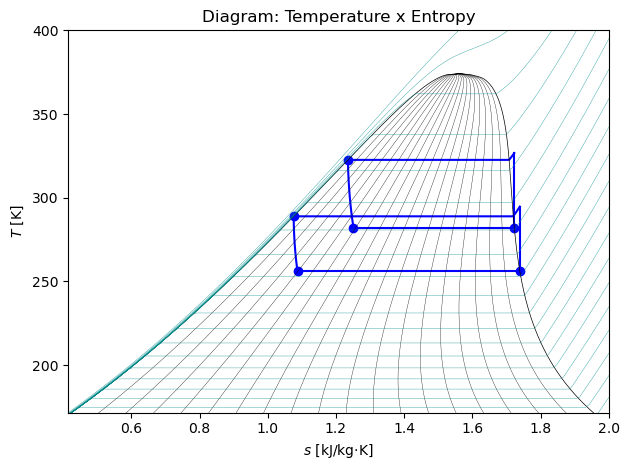

In [2]:
builder = CycleBuilder('R134a')
(builder
    .add_evaporator(
        'evaporator',
        'expansion valve b',
        'compressor b')
    .add_pump(
        'compressor b',
        'evaporator',
        'heat exchanger',
        0.5e6,
        eta=1.0)
    .add_heat_exchanger(
        'heat exchanger',
        'expansion valve a',
        'compressor b',
        'compressor a',
        'expansion valve b')
    .add_trap(
        'expansion valve b',
        'heat exchanger',
        'evaporator',
        150e3)
    .add_pump(
        'compressor a',
        'heat exchanger',
        'condenser',
        1.3e6,
        eta=1.0)
    .add_condenser(
        'condenser',
        'compressor a',
        'expansion valve a')
    .add_trap(
        'expansion valve a',
        'condenser',
        'heat exchanger',
        0.4e6))

cycle = builder.build()
x0 = np.array(8 * [0.5e6, 300.0])
sol = cycle.solve(x0, ['P', 'T'])

print(sol.x)

pp = PropertyPlot('R134a', 'TS', unit_system='kSI')
pp.calc_isolines(CP.iQ, num=20)
pp.calc_isolines(CP.iP, num=20)

for state in [cloud.to_state_container() for cloud in cycle.graph.cloud_points(100, False)]:
    pp.draw_process(state, line_opts={'color': 'blue', 'lw': 1.5})

pp.title(r'Diagram: Temperature x Entropy')
pp.xlabel(r'$s$ [kJ/kg·K]')
pp.ylabel(r'$T$ [K]')
pp.set_axis_limits([None, 2, None, 400])
pp.show()

# State indexes
# Index:  0, State:  4
# Index:  1, State:  1
# Index:  2, State:  2
# Index:  3, State:  8
# Index:  4, State:  5
# Index:  5, State:  3
# Index:  6, State:  6
# Index:  7, State:  7